In [170]:
import sys
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Import supplementary visualizations code visuals.py
import visuals as vs
from sklearn.model_selection import train_test_split
# Pretty display for notebooks
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [48]:
# Initially, loading the city health behaviors and outcomes dataset
# from initial csv files. 
# csv files come with columns including year, city, measure, value etc
# so a column describes all measures, the column next describes corresponding 
# values. the code here reads in this data, then reformats
# to generate dicts with cities as keys to nested
# dicts where health metric is prevalence is the value 

'''
try:
    outcomes = pd.read_csv("500_Cities_Health_Outcomes_raw.csv", index_col = 'Unnamed: 0')
    behaviors = pd.read_csv("500_Cities_Health_Behaviors_raw.csv", index_col = 'Unnamed: 0')
    #data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Health Outcomes dataset has {} samples with {} features each.".format(*outcomes.shape)
    print "Unhealthy Behaviors dataset has {} samples with {} features each.".format(*behaviors.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
'''    
    

'\ntry:\n    outcomes = pd.read_csv("500_Cities_Health_Outcomes_raw.csv", index_col = \'Unnamed: 0\')\n    behaviors = pd.read_csv("500_Cities_Health_Behaviors_raw.csv", index_col = \'Unnamed: 0\')\n    #data.drop([\'Region\', \'Channel\'], axis = 1, inplace = True)\n    print "Health Outcomes dataset has {} samples with {} features each.".format(*outcomes.shape)\n    print "Unhealthy Behaviors dataset has {} samples with {} features each.".format(*behaviors.shape)\nexcept:\n    print "Dataset could not be loaded. Is the dataset missing?"\n'

In [49]:

# Initially, loading the city health behaviors and outcomes dataset
# from initial csv files. 
# csv files come with columns including year, city, measure, value etc
# so a column describes all measures, the column next describes corresponding 
# values. the code here reads in this data, then reformats
# to generate dicts with cities as keys to nested
# dicts where health metric is prevalence is the value 

'''

outcomes_dict = {outcome.CityName:{outcome.Short_Question_Text: 0}}
behaviors_dict = {behavior.CityName:{behavior.Short_Question_Text: 0}}

for item in outcomes.itertuples():
    # if CityName is in current outcomes dict, just add metric and value. 
    # if not, add Cityname metric and value
    if item.CityName in outcomes_dict:
        outcomes_dict[item.CityName][item.Short_Question_Text] = item.Data_Value
    else:
        outcomes_dict[item.CityName] = {item.Short_Question_Text:item.Data_Value}
    
    # reformat latitude and longitude data
    geo_lat, geo_long = tuple(item.GeoLocation.strip('()').split(','))
    #print "lat = {} long = {}".format(geo_lat, geo_long)
    outcomes_dict[item.CityName]['GeoLat'] = float(geo_lat)
    outcomes_dict[item.CityName]['GeoLong'] = float(geo_long)
    
for item in behaviors.itertuples():
    # if CityName is in current outcomes dict, just add metric and value. 
    # if not, add Cityname metric and value
    if item.CityName in behaviors_dict:
        behaviors_dict[item.CityName][item.Short_Question_Text] = item.Data_Value
    else:
        behaviors_dict[item.CityName] = {item.Short_Question_Text:item.Data_Value}
    
    # reformat latitude and longitude data
    geo_lat, geo_long = tuple(item.GeoLocation.strip('()').split(','))
    #print "lat = {} long = {}".format(geo_lat, geo_long)
    behaviors_dict[item.CityName]['GeoLat'] = float(geo_lat)
    behaviors_dict[item.CityName]['GeoLong'] = float(geo_long)
    
    
    #behaviors_dict[item.CityName]['GeoLocation'] = item.GeoLocation
    
print item

# create dataframes from dicts
outcomes_df = pd.DataFrame.from_dict(outcomes_dict, 'index')
behaviors_df = pd.DataFrame.from_dict(behaviors_dict, 'index')


# to make future loading and unloading easier, the dataframes are
# written to csv files. we can now just read these files in already 
#formatted

outcomes_df.to_csv('500_Cities_Health_Outcomes.csv')
behaviors_df.to_csv('500_Cities_Health_Behaviors.csv')

'''

'\n\noutcomes_dict = {outcome.CityName:{outcome.Short_Question_Text: 0}}\nbehaviors_dict = {behavior.CityName:{behavior.Short_Question_Text: 0}}\n\nfor item in outcomes.itertuples():\n    # if CityName is in current outcomes dict, just add metric and value. \n    # if not, add Cityname metric and value\n    if item.CityName in outcomes_dict:\n        outcomes_dict[item.CityName][item.Short_Question_Text] = item.Data_Value\n    else:\n        outcomes_dict[item.CityName] = {item.Short_Question_Text:item.Data_Value}\n    \n    # reformat latitude and longitude data\n    geo_lat, geo_long = tuple(item.GeoLocation.strip(\'()\').split(\',\'))\n    #print "lat = {} long = {}".format(geo_lat, geo_long)\n    outcomes_dict[item.CityName][\'GeoLat\'] = float(geo_lat)\n    outcomes_dict[item.CityName][\'GeoLong\'] = float(geo_long)\n    \nfor item in behaviors.itertuples():\n    # if CityName is in current outcomes dict, just add metric and value. \n    # if not, add Cityname metric and value\n  

In [171]:
# reading in reformatted csv files directly into dataframes
try:
    outcomes_df = pd.read_csv('500_Cities_Health_Outcomes.csv')
    behaviors_df = pd.read_csv('500_Cities_Health_Behaviors.csv')
    print "Health Outcomes dataset has {} samples with {} features each.".format(*outcomes_df.shape)
    print "Unhealthy Behaviors dataset has {} samples with {} features each.".format(*behaviors_df.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    

#outcomes_df = outcomes_df.drop('GeoLong', 1, inplace = True)
#outcomes_df = outcomes_df.drop('GeoLat', 1, inplace = True)
outcomes_df.head()

Health Outcomes dataset has 474 samples with 16 features each.
Unhealthy Behaviors dataset has 474 samples with 8 features each.


,Unnamed: 0,Chronic Kidney Disease,GeoLat,COPD,Cancer (except skin),Arthritis,Mental Health,GeoLong,Teeth Loss,Stroke,High Cholesterol,Current Asthma,Diabetes,Physical Health,High Blood Pressure,Coronary Heart Disease
0,Abilene,3.3,32.454651,6.7,6.0,22.4,11.6,-99.738304,14.3,3.1,34.4,8.9,10.9,12.6,31.6,6.3
1,Akron,3.3,41.080144,9.4,5.7,29.0,15.3,-81.521921,23.6,3.9,33.0,11.6,13.0,15.5,36.2,7.5
2,Alameda,2.2,37.765085,4.3,5.7,18.5,9.8,-122.266490,7.5,2.2,31.3,7.9,8.1,9.6,24.3,4.5
3,Albany,2.2,42.666397,7.1,5.8,25.7,13.2,-73.798683,16.5,3.3,33.8,10.9,10.9,13.1,33.4,6.0
4,Albuquerque,2.9,35.105503,5.4,6.1,22.4,11.6,-106.647448,14.0,2.6,29.2,9.8,9.3,12.1,25.9,5.3


In [172]:
outcomes_df.describe()[['COPD', 'Stroke']]


,COPD,Stroke
count,474.000000,474.000000
mean,6.268354,3.001055
std,1.542125,0.676281
min,3.300000,1.700000
25%,5.100000,2.500000
50%,6.200000,3.000000
75%,7.200000,3.400000
max,11.400000,5.800000


In [173]:
# this processing steps were originally performed on the data
# and data was written to the csv files to avoid these steps in 
# the future


'''
# rename index to 'Cities' in behavior and outcomes dataframes (df)
behaviors_df.rename(columns = {'Unnamed: 0': 'Cities'}, inplace = True)
behaviors_df.set_index(['Cities'], inplace = True)
behaviors_df.head()



outcomes_df.rename(columns = {'Unnamed: 0': 'Cities'}, inplace = True)
outcomes_df.set_index(['Cities'], inplace = True)
#outcomes_df.index.names = ['Cities']
outcomes_df.head()
'''
behaviors_df.rename(columns = {'Unnamed: 0': 'Cities'}, inplace = True)
outcomes_df.rename(columns = {'Unnamed: 0': 'Cities'}, inplace = True)

In [174]:
behaviors_df.head()

,Cities,GeoLat,Current Smoking,Physical Activity,GeoLong,Binge Drinking,Sleep,Obesity
0,Abilene,32.454651,19.6,27.7,-99.738304,16.2,35.4,33.7
1,Akron,41.080144,26.8,31.0,-81.521921,14.8,44.1,37.3
2,Alameda,37.765085,11.9,18.7,-122.266490,15.0,32.3,18.7
3,Albany,42.666397,19.0,26.1,-73.798683,15.5,39.7,31.1
4,Albuquerque,35.105503,18.8,20.4,-106.647448,14.5,32.8,25.5


In [283]:

# combine outcomes and behaviors into one df so we can do correlations
# across all variablesz


# TODO: Select three indices of your choice you wish to sample from the dataset
big_cities = ['New York', 'San Francisco', 'Birmingham']

# Create a DataFrame of the chosen samples
samples = outcomes_df[outcomes_df['Cities'].isin(big_cities)] #, columns = outcomes_df.keys()).reset_index(drop = True)
print "Chosen samples of data outcomes dataset:"

display(samples)

means = outcomes_df.describe().loc['mean']
compare = samples.copy()


#means.insert(0, 'Means')
#means_Dict = {'Cities':means.values}
#display(compare['Cities'] == 'Abeline')
display(means)
compare.append(means)


print "aaaaaand"
display(compare)



'''
compare.append(means.values)
new_index = ['sample0', 'sample1', 'sample2', 'means']
compare.index = new_index

display(compare.applymap("{:.0f}".format))
compare.transpose().plot(kind = 'bar');plt.show()
'''

Chosen samples of data outcomes dataset:


,Cities,Chronic Kidney Disease,GeoLat,COPD,Cancer (except skin),Arthritis,Mental Health,GeoLong,Teeth Loss,Stroke,High Cholesterol,Current Asthma,Diabetes,Physical Health,High Blood Pressure,Coronary Heart Disease
41,Birmingham,3.3,33.527566,9.4,6.1,32.6,17.0,-86.798817,25.9,5.0,35.4,11.4,16.1,18.3,45.9,7.6
284,New York,2.3,40.694961,6.0,5.3,22.4,12.6,-73.931385,15.9,3.1,34.1,10.2,11.2,13.1,30.7,5.6
371,San Francisco,2.2,37.755914,4.3,5.2,17.5,9.8,-122.440988,9.2,2.3,31.4,7.7,8.9,10.1,25.9,4.7


Chronic Kidney Disease     2.782278
GeoLat                    36.960346
COPD                       6.268354
Cancer (except skin)       5.851688
Arthritis                 23.181013
Mental Health             12.166878
GeoLong                  -98.009025
Teeth Loss                14.507384
Stroke                     3.001055
High Cholesterol          33.090717
Current Asthma             9.322574
Diabetes                  10.338608
Physical Health           12.552532
High Blood Pressure       30.789662
Coronary Heart Disease     5.960549
Name: mean, dtype: float64

aaaaaand


,Cities,Chronic Kidney Disease,GeoLat,COPD,Cancer (except skin),Arthritis,Mental Health,GeoLong,Teeth Loss,Stroke,High Cholesterol,Current Asthma,Diabetes,Physical Health,High Blood Pressure,Coronary Heart Disease
41,Birmingham,3.3,33.527566,9.4,6.1,32.6,17.0,-86.798817,25.9,5.0,35.4,11.4,16.1,18.3,45.9,7.6
284,New York,2.3,40.694961,6.0,5.3,22.4,12.6,-73.931385,15.9,3.1,34.1,10.2,11.2,13.1,30.7,5.6
371,San Francisco,2.2,37.755914,4.3,5.2,17.5,9.8,-122.440988,9.2,2.3,31.4,7.7,8.9,10.1,25.9,4.7


'\ncompare.append(means.values)\nnew_index = [\'sample0\', \'sample1\', \'sample2\', \'means\']\ncompare.index = new_index\n\ndisplay(compare.applymap("{:.0f}".format))\ncompare.transpose().plot(kind = \'bar\');plt.show()\n'

In [176]:
means['Cities'] = 'Means'
display(means)


Chronic Kidney Disease    2.78228
GeoLat                    36.9603
COPD                      6.26835
Cancer (except skin)      5.85169
Arthritis                  23.181
Mental Health             12.1669
GeoLong                   -98.009
Teeth Loss                14.5074
Stroke                    3.00105
High Cholesterol          33.0907
Current Asthma            9.32257
Diabetes                  10.3386
Physical Health           12.5525
High Blood Pressure       30.7897
Coronary Heart Disease    5.96055
Cities                      Means
Name: mean, dtype: object

In [177]:
compare = samples.copy()

means['Cities'] = 'Means'
means_df = pd.DataFrame([means.values], columns = means.index)
means_df = means_df.sort_index(axis = 1)

# code for displaying data formatted to 0.2f but leave the numbers as is. 
# this actually converts the numbers to formatted strings
#means_df = means_df.reindex_axis(sorted(means_df.columns), axis=1)
#means_df = means_df.applymap(lambda x: "%.2f" %x if isinstance(x, float) else x) 



#display(isinstance(means_df.loc[0][0], float))
#means_df.applymap(lambda x: "%.2f" %x if isinstance(x, float) else x)
compare = compare.sort_index(axis = 1) #(sorted(compare.columns), axis=1)

#display(means_df)
#display(compare)



try:
    compare = compare.append(means_df, ignore_index = True)
    display(compare)
except: 
    print "could not append data"


,Arthritis,COPD,Cancer (except skin),Chronic Kidney Disease,Cities,Coronary Heart Disease,Current Asthma,Diabetes,GeoLat,GeoLong,High Blood Pressure,High Cholesterol,Mental Health,Physical Health,Stroke,Teeth Loss
0,32.600000,9.400000,6.100000,3.300000,Birmingham,7.600000,11.400000,16.100000,33.527566,-86.798817,45.900000,35.400000,17.000000,18.300000,5.000000,25.900000
1,22.400000,6.000000,5.300000,2.300000,New York,5.600000,10.200000,11.200000,40.694961,-73.931385,30.700000,34.100000,12.600000,13.100000,3.100000,15.900000
2,17.500000,4.300000,5.200000,2.200000,San Francisco,4.700000,7.700000,8.900000,37.755914,-122.440988,25.900000,31.400000,9.800000,10.100000,2.300000,9.200000
3,23.181013,6.268354,5.851688,2.782278,Means,5.960549,9.322574,10.338608,36.960346,-98.009025,30.789662,33.090717,12.166878,12.552532,3.001055,14.507384


In [178]:
#new_index = ['Chicago', 'New York', 'San Francisco', 'means']

compare.index = compare.Cities
compare.drop(['Cities', 'GeoLat', 'GeoLong'], axis = 1, inplace = True)

Cities,Birmingham,New York,San Francisco,Means
Arthritis,32.6,22.4,17.5,23.181013
COPD,9.4,6.0,4.3,6.268354
Cancer (except skin),6.1,5.3,5.2,5.851688
Chronic Kidney Disease,3.3,2.3,2.2,2.782278
Coronary Heart Disease,7.6,5.6,4.7,5.960549
Current Asthma,11.4,10.2,7.7,9.322574
Diabetes,16.1,11.2,8.9,10.338608
High Blood Pressure,45.9,30.7,25.9,30.789662
High Cholesterol,35.4,34.1,31.4,33.090717
Mental Health,17.0,12.6,9.8,12.166878


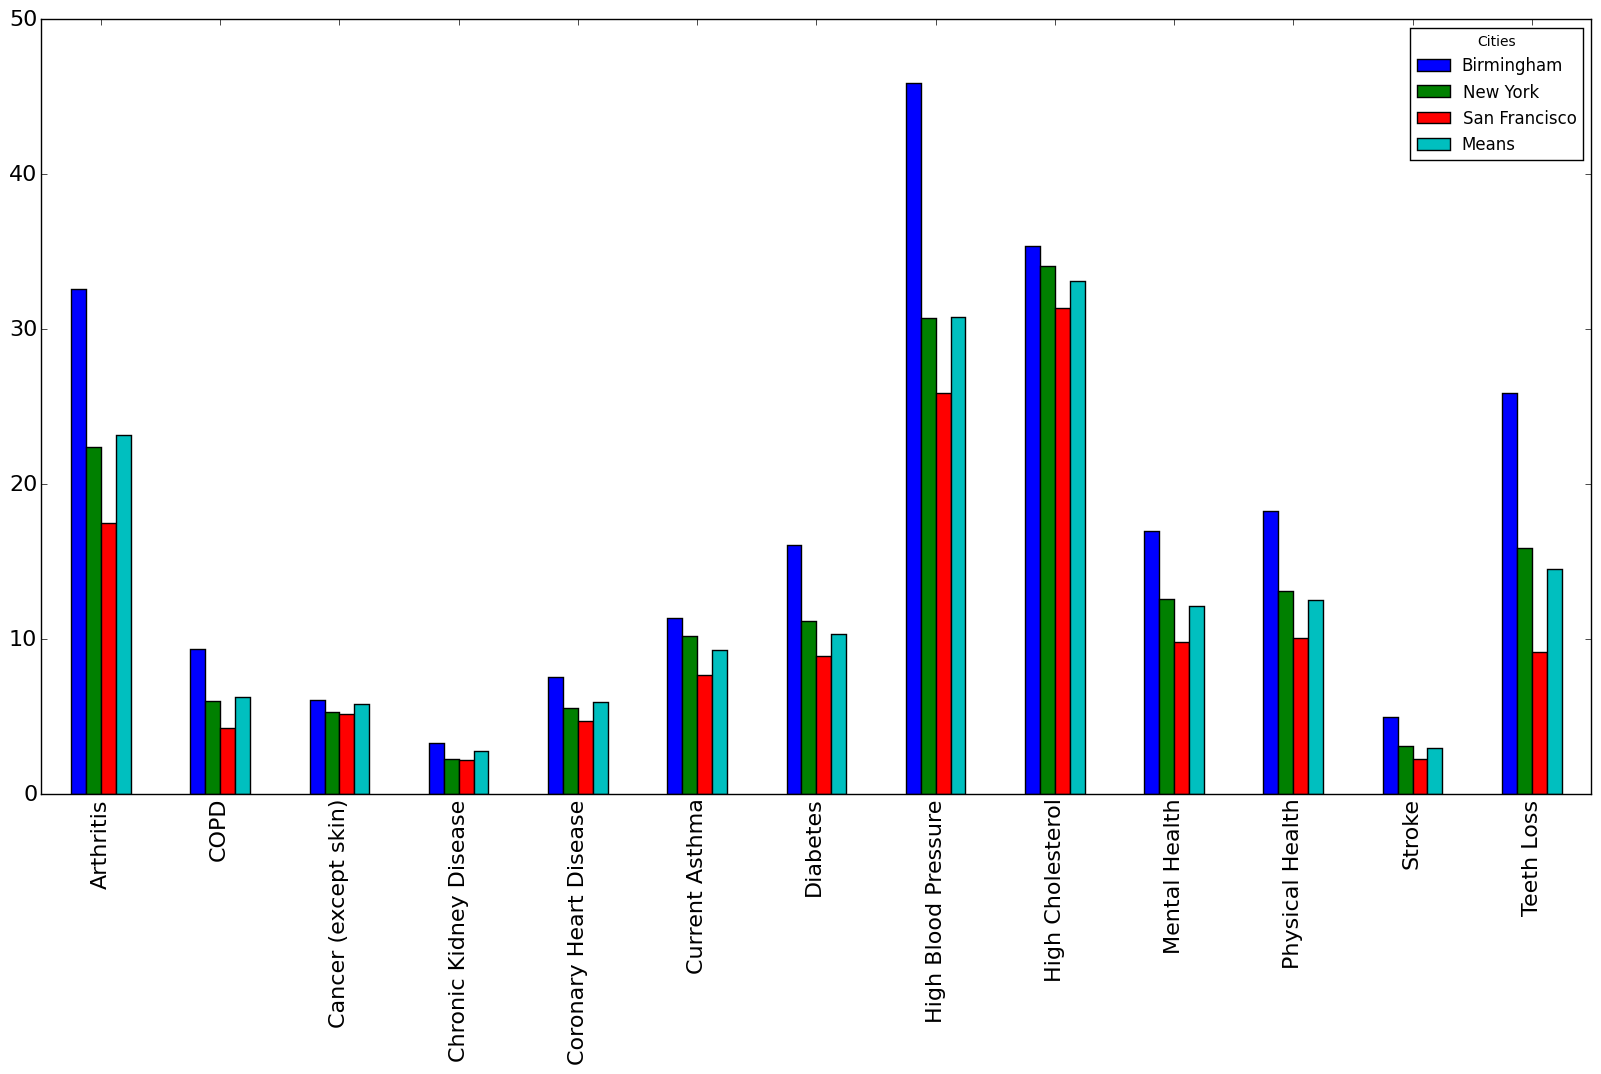

In [179]:
display(compare.transpose())
#plt.figure()
#f, ax = plt.subplots(figsize=(25,17))
compare.transpose().plot(kind = 'bar', figsize = (20, 10), fontsize = 16);
plt.show()

In [246]:
frames = [outcomes_df, behaviors_df]
datacorr_df = pd.concat(frames, axis=1)
datacorr_df.head()


,Cities,Chronic Kidney Disease,GeoLat,COPD,Cancer (except skin),Arthritis,Mental Health,GeoLong,Teeth Loss,Stroke,...,High Blood Pressure,Coronary Heart Disease,Cities,GeoLat,Current Smoking,Physical Activity,GeoLong,Binge Drinking,Sleep,Obesity
0,Abilene,3.3,32.454651,6.7,6.0,22.4,11.6,-99.738304,14.3,3.1,...,31.6,6.3,Abilene,32.454651,19.6,27.7,-99.738304,16.2,35.4,33.7
1,Akron,3.3,41.080144,9.4,5.7,29.0,15.3,-81.521921,23.6,3.9,...,36.2,7.5,Akron,41.080144,26.8,31.0,-81.521921,14.8,44.1,37.3
2,Alameda,2.2,37.765085,4.3,5.7,18.5,9.8,-122.266490,7.5,2.2,...,24.3,4.5,Alameda,37.765085,11.9,18.7,-122.266490,15.0,32.3,18.7
3,Albany,2.2,42.666397,7.1,5.8,25.7,13.2,-73.798683,16.5,3.3,...,33.4,6.0,Albany,42.666397,19.0,26.1,-73.798683,15.5,39.7,31.1
4,Albuquerque,2.9,35.105503,5.4,6.1,22.4,11.6,-106.647448,14.0,2.6,...,25.9,5.3,Albuquerque,35.105503,18.8,20.4,-106.647448,14.5,32.8,25.5


/Users/robertbeetel/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


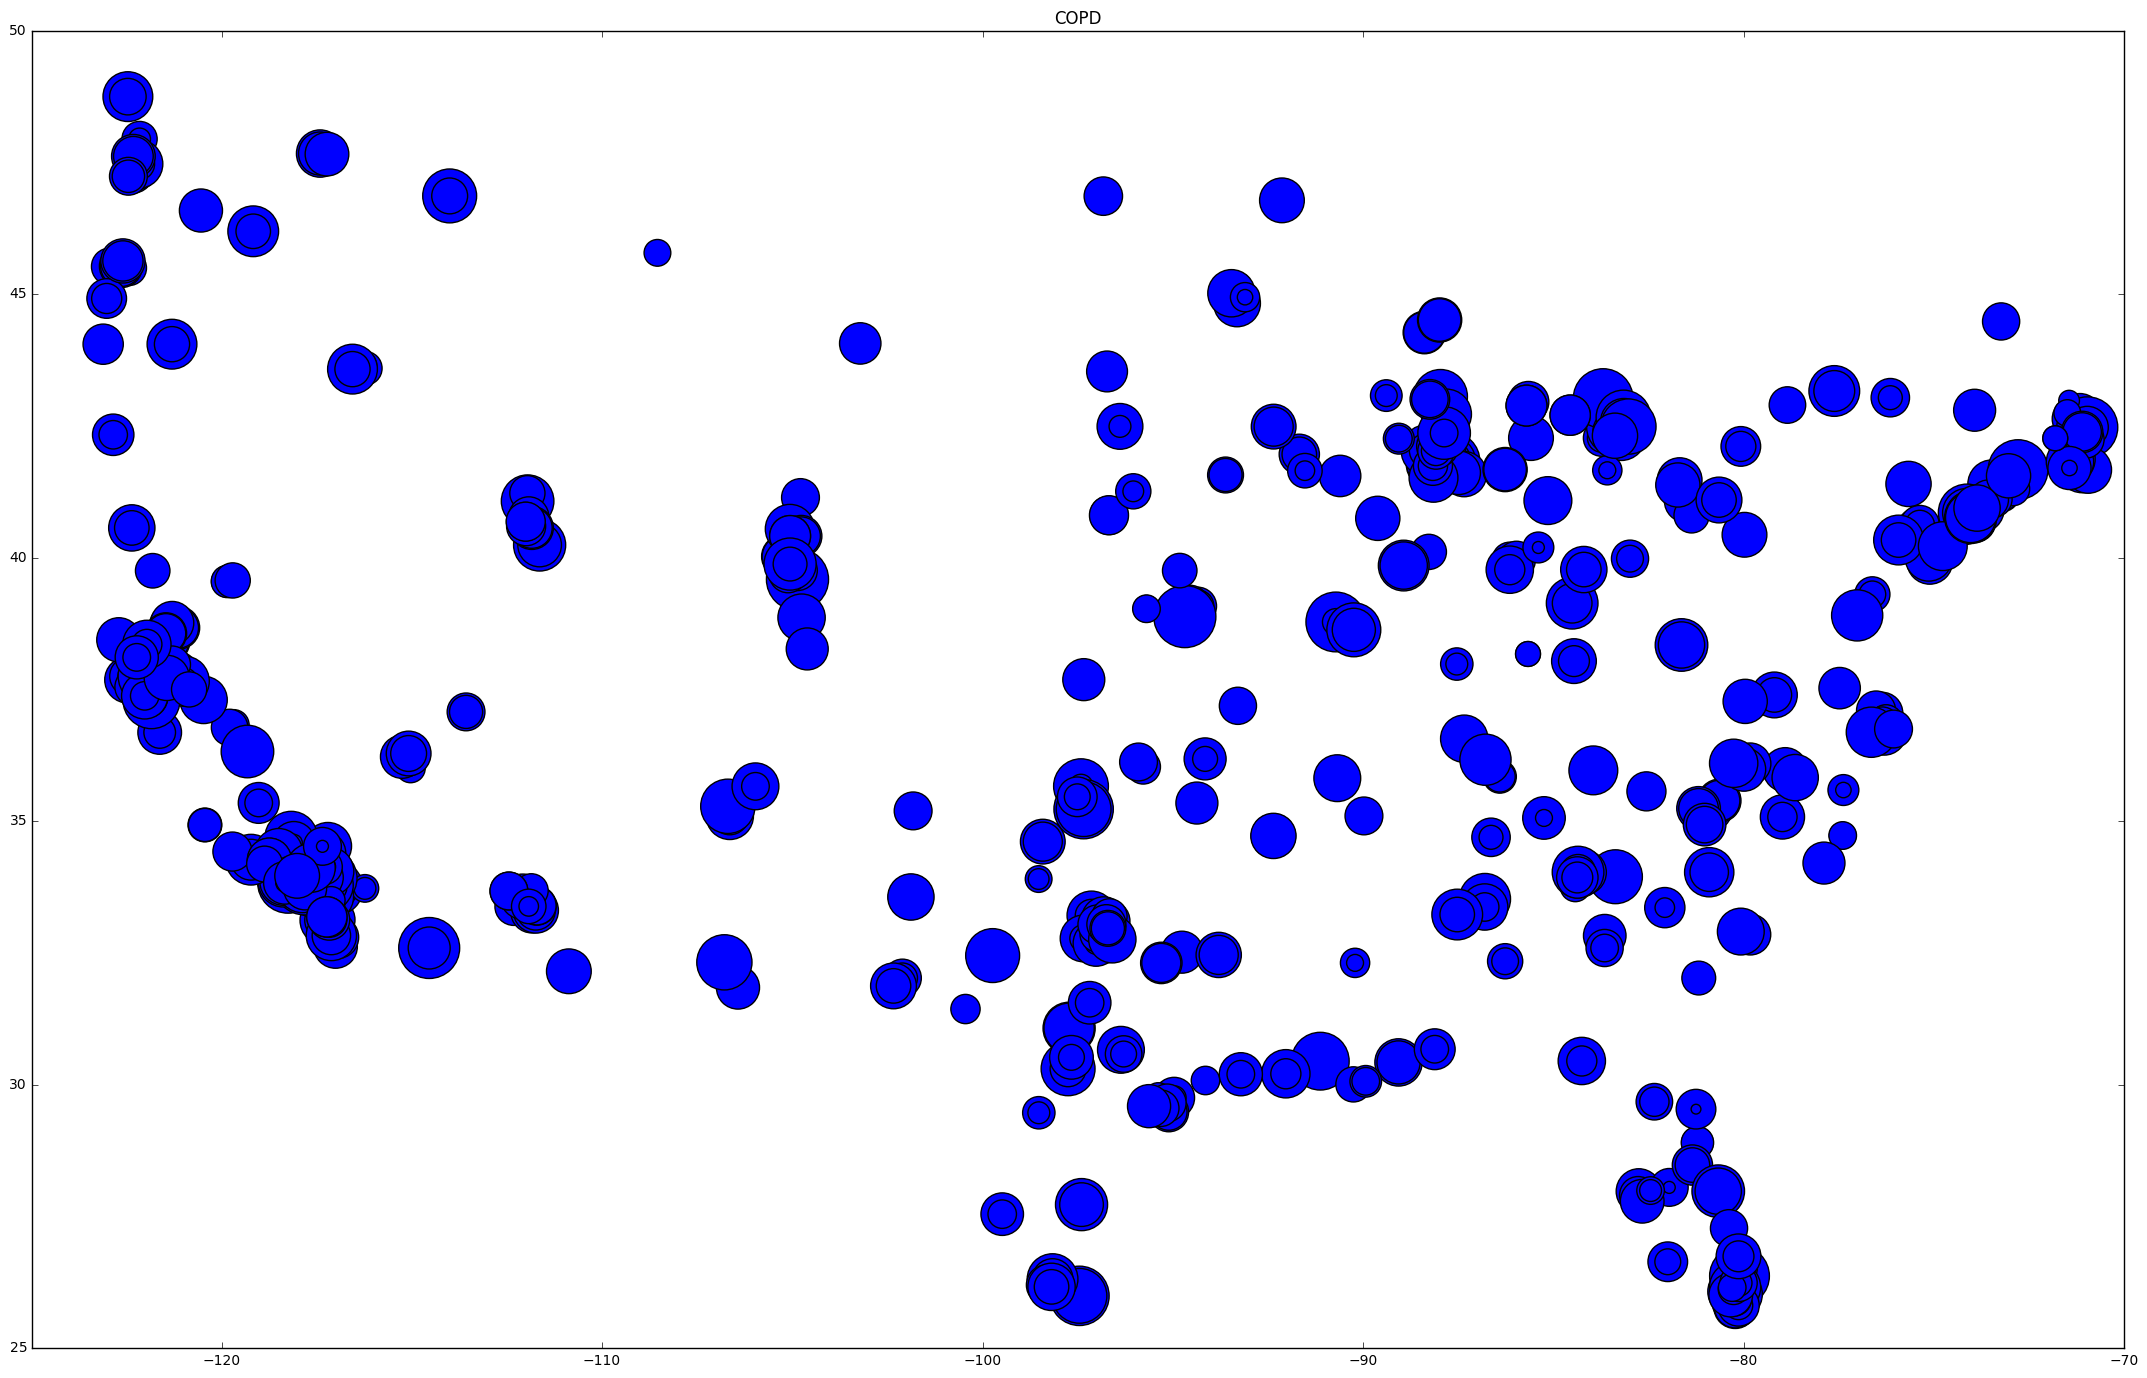

In [182]:
# code for displaying a cities condition prevalence, in this case COPD
# in its geographical location i.e. on a map, with the marker size 
# proportional to the prevalence value

# prevalence values are normalized 
#display(high_corr)
maxCOPD = datacorr_df.COPD.max()
minCOPD = datacorr_df.COPD.min()
rangeCOPD = maxCOPD - minCOPD

#plot data 
f, ax = plt.subplots(figsize=(55/2,35/2))
ax.set_title('COPD')
#plt.title("COPD in Continental US")
ax.axis([-125.0, -70.0, 25.0, 50.0])

COPD_prev = (datacorr_df['COPD'] - minCOPD)/rangeCOPD

# error message says element-wise comparison fails but plot still works

ax.scatter(datacorr_df.GeoLong, datacorr_df.GeoLat, s = 2000*COPD_prev)
#plt.figure(figsize =(20,10))
#plt.scatter(datacorr_df.GeoLong, datacorr_df.GeoLat, s = 30*(datacorr_df.COPD-minCOPD)/rangeCOPD)
plt.show()

In [183]:
# perform corrlation between all outcomes and behaviors
# select correlation values above certain thresholds and create
# list of correlated variables

#corr_threshold = 0.80
high_corr = datacorr_df.corr()
#high_corr = high_corr[abs(high_corr) >= corr_threshold]

col_names = high_corr.columns
#display(high_corr.iloc[0].name)
#display(high_corr.iloc[0][0])
#display(col_names[0])
stroke_df = high_corr.Stroke
stroke_df.head()

Chronic Kidney Disease    0.685028
GeoLat                   -0.059188
COPD                      0.831702
Cancer (except skin)     -0.221284
Arthritis                 0.725383
Name: Stroke, dtype: float64

In [21]:
'''
# print items to confirm what we've got
for item in high_corr.head().itertuples():
    for i in range(len(item)):
        if not pd.isnull(item[i]):
            print "{}   {}".format(col_names[i], item[i])
'''


'\n# print items to confirm what we\'ve got\nfor item in high_corr.head().itertuples():\n    for i in range(len(item)):\n        if not pd.isnull(item[i]):\n            print "{}   {}".format(col_names[i], item[i])\n'

In [184]:
not pd.isnull(item[i])

NameError: name 'item' is not defined

In [185]:
stroke_df

Chronic Kidney Disease    0.685028
GeoLat                   -0.059188
COPD                      0.831702
Cancer (except skin)     -0.221284
Arthritis                 0.725383
Mental Health             0.835944
GeoLong                   0.364517
Teeth Loss                0.885558
Stroke                    1.000000
High Cholesterol          0.530339
Current Asthma            0.677891
Diabetes                  0.877367
Physical Health           0.843972
High Blood Pressure       0.874823
Coronary Heart Disease    0.876573
GeoLat                   -0.059188
Current Smoking           0.780398
Physical Activity         0.813787
GeoLong                   0.364517
Binge Drinking           -0.489722
Sleep                     0.776520
Obesity                   0.852384
Name: Stroke, dtype: float64

In [204]:
# looking at variables correlated with Stroke
#figure out how to generate a list of the names of things highly correlated 
#with stroke
corr_threshold = 0.8
stroke_preds = []


for i in range(len(stroke_df)):
    val = abs(stroke_df[i])
    if val > corr_threshold:
        print "{}   {}".format(stroke_df.axes[0][i], stroke_df[i])
        stroke_preds.append(stroke_df.axes[0][i])

        
'''
for i in range(len(high_corr['Stroke'])):
    val = high_corr['Stroke'][i]
    if val > corr_threshold:
        print "{}   {}".format(high_corr.axes[0][i], val)
        stroke_preds.append(high_corr.axes[0][i])

'''

# stroke is correlated with itself so we remove it as a variable
stroke_preds.remove('Stroke')

print stroke_preds



COPD   0.831702134952
Mental Health   0.835944251227
Teeth Loss   0.885558062872
Stroke   1.0
Diabetes   0.877367244945
Physical Health   0.843972193685
High Blood Pressure   0.874823345389
Coronary Heart Disease   0.876572867993
Physical Activity   0.813787042293
Obesity   0.852384375754
['COPD', 'Mental Health', 'Teeth Loss', 'Diabetes', 'Physical Health', 'High Blood Pressure', 'Coronary Heart Disease', 'Physical Activity', 'Obesity']


In [205]:
# behaviors_only_df = behaviors_df.drop(['GeoLong'], axis = 1)
# behaviors_only_df.head()
# create linear regression cross validation prediction using stroke_preds as X and stroke prevalence as y
# plot the predicted stroke prevalence against the actual
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score

X = datacorr_df[stroke_preds]
#display(X.head())
y = datacorr_df.Stroke


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
#y_pred = regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "r^2 value of Grocery prediction was {}".format(score)





r^2 value of Grocery prediction was 0.793125146648


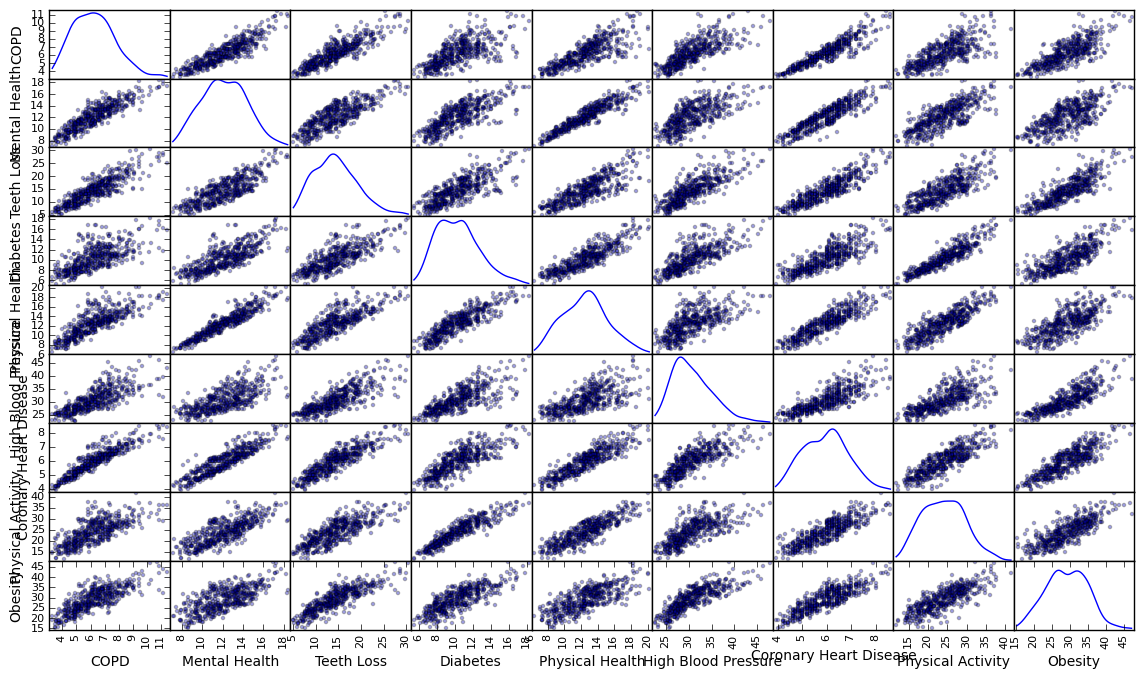

In [206]:
# Produce a scatter matrix for each pair of features in the data

pd.scatter_matrix(datacorr_df[stroke_preds], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

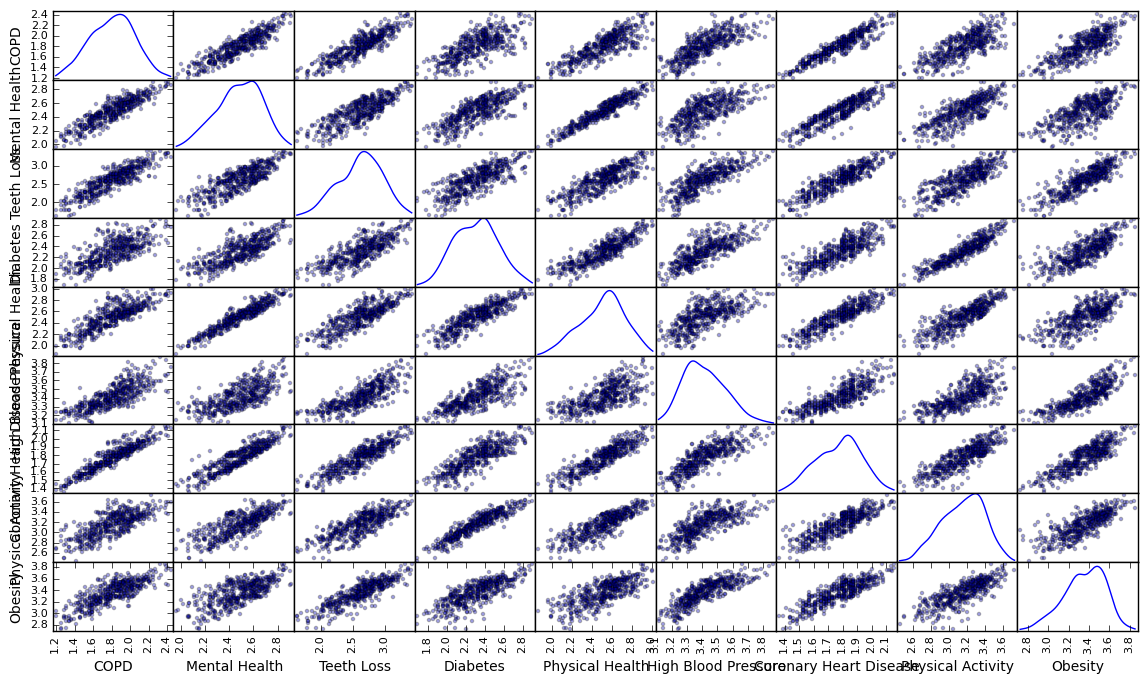

In [209]:
# original data was pretty normal to start but 
# looking at log transform data to see if we can normalize data further. 
# result was similar to original so will continue to use 'raw' data. 

log_datacorr_df = np.log(datacorr_df[stroke_preds])

# TODO: Scale the sample data using the natural logarithm
#log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_datacorr_df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [232]:
datacorr2_df = datacorr_df.drop(['Cities'], axis =1)
display(datacorr2_df.head())


,Chronic Kidney Disease,GeoLat,COPD,Cancer (except skin),Arthritis,Mental Health,GeoLong,Teeth Loss,Stroke,High Cholesterol,...,Physical Health,High Blood Pressure,Coronary Heart Disease,GeoLat,Current Smoking,Physical Activity,GeoLong,Binge Drinking,Sleep,Obesity
0,3.3,32.454651,6.7,6.0,22.4,11.6,-99.738304,14.3,3.1,34.4,...,12.6,31.6,6.3,32.454651,19.6,27.7,-99.738304,16.2,35.4,33.7
1,3.3,41.080144,9.4,5.7,29.0,15.3,-81.521921,23.6,3.9,33.0,...,15.5,36.2,7.5,41.080144,26.8,31.0,-81.521921,14.8,44.1,37.3
2,2.2,37.765085,4.3,5.7,18.5,9.8,-122.266490,7.5,2.2,31.3,...,9.6,24.3,4.5,37.765085,11.9,18.7,-122.266490,15.0,32.3,18.7
3,2.2,42.666397,7.1,5.8,25.7,13.2,-73.798683,16.5,3.3,33.8,...,13.1,33.4,6.0,42.666397,19.0,26.1,-73.798683,15.5,39.7,31.1
4,2.9,35.105503,5.4,6.1,22.4,11.6,-106.647448,14.0,2.6,29.2,...,12.1,25.9,5.3,35.105503,18.8,20.4,-106.647448,14.5,32.8,25.5


In [243]:
stroke_preds = np.unique(stroke_preds)
display(stroke_preds)

array(['COPD', 'Cities', 'Coronary Heart Disease', 'Diabetes',
       'High Blood Pressure', 'Mental Health', 'Obesity',
       'Physical Activity', 'Physical Health', 'Teeth Loss'], 
      dtype='|S22')

Index([u'Arthritis', u'Binge Drinking', u'COPD', u'Cancer (except skin)',
       u'Chronic Kidney Disease', u'Cities', u'Coronary Heart Disease',
       u'Current Asthma', u'Current Smoking', u'Diabetes', u'GeoLat',
       u'GeoLong', u'High Blood Pressure', u'High Cholesterol',
       u'Mental Health', u'Obesity', u'Physical Activity', u'Physical Health',
       u'Sleep', u'Stroke', u'Teeth Loss'],
      dtype='object')

In [247]:
# create dataframe with cities as index so we can do outlier calculations but still maintain cities info
display(datacorr_df.head())

,Cities,Chronic Kidney Disease,GeoLat,COPD,Cancer (except skin),Arthritis,Mental Health,GeoLong,Teeth Loss,Stroke,...,High Blood Pressure,Coronary Heart Disease,Cities,GeoLat,Current Smoking,Physical Activity,GeoLong,Binge Drinking,Sleep,Obesity
0,Abilene,3.3,32.454651,6.7,6.0,22.4,11.6,-99.738304,14.3,3.1,...,31.6,6.3,Abilene,32.454651,19.6,27.7,-99.738304,16.2,35.4,33.7
1,Akron,3.3,41.080144,9.4,5.7,29.0,15.3,-81.521921,23.6,3.9,...,36.2,7.5,Akron,41.080144,26.8,31.0,-81.521921,14.8,44.1,37.3
2,Alameda,2.2,37.765085,4.3,5.7,18.5,9.8,-122.266490,7.5,2.2,...,24.3,4.5,Alameda,37.765085,11.9,18.7,-122.266490,15.0,32.3,18.7
3,Albany,2.2,42.666397,7.1,5.8,25.7,13.2,-73.798683,16.5,3.3,...,33.4,6.0,Albany,42.666397,19.0,26.1,-73.798683,15.5,39.7,31.1
4,Albuquerque,2.9,35.105503,5.4,6.1,22.4,11.6,-106.647448,14.0,2.6,...,25.9,5.3,Albuquerque,35.105503,18.8,20.4,-106.647448,14.5,32.8,25.5


In [248]:
_, i = np.unique(datacorr_df.columns, return_index = True)
datacorr_df = datacorr_df.iloc[:,i]
display(datacorr_df.head())

,Arthritis,Binge Drinking,COPD,Cancer (except skin),Chronic Kidney Disease,Cities,Coronary Heart Disease,Current Asthma,Current Smoking,Diabetes,...,GeoLong,High Blood Pressure,High Cholesterol,Mental Health,Obesity,Physical Activity,Physical Health,Sleep,Stroke,Teeth Loss
0,22.4,16.2,6.7,6.0,3.3,Abilene,6.3,8.9,19.6,10.9,...,-99.738304,31.6,34.4,11.6,33.7,27.7,12.6,35.4,3.1,14.3
1,29.0,14.8,9.4,5.7,3.3,Akron,7.5,11.6,26.8,13.0,...,-81.521921,36.2,33.0,15.3,37.3,31.0,15.5,44.1,3.9,23.6
2,18.5,15.0,4.3,5.7,2.2,Alameda,4.5,7.9,11.9,8.1,...,-122.266490,24.3,31.3,9.8,18.7,18.7,9.6,32.3,2.2,7.5
3,25.7,15.5,7.1,5.8,2.2,Albany,6.0,10.9,19.0,10.9,...,-73.798683,33.4,33.8,13.2,31.1,26.1,13.1,39.7,3.3,16.5
4,22.4,14.5,5.4,6.1,2.9,Albuquerque,5.3,9.8,18.8,9.3,...,-106.647448,25.9,29.2,11.6,25.5,20.4,12.1,32.8,2.6,14.0


In [251]:
# identifying outliers as data points which are 1.5*interquartile range and removing from the dataset


names_dict = {}
suffix = '_outliers'



stroke_df = datacorr_df[stroke_preds]

# added this step to make cities the index thereby maintaing city info but not running into 
# issues in the steps where we calculate the percentiles below, steps which require numerical data
# getting around this by putting an if != 'Cities' statement below. 
#stroke_df.set_index(['Cities'], inplace = True)
display(stroke_df.head())

,COPD,Cities,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
0,6.7,Abilene,6.3,10.9,31.6,11.6,33.7,27.7,12.6,14.3
1,9.4,Akron,7.5,13.0,36.2,15.3,37.3,31.0,15.5,23.6
2,4.3,Alameda,4.5,8.1,24.3,9.8,18.7,18.7,9.6,7.5
3,7.1,Albany,6.0,10.9,33.4,13.2,31.1,26.1,13.1,16.5
4,5.4,Albuquerque,5.3,9.3,25.9,11.6,25.5,20.4,12.1,14.0


In [252]:
for feature in stroke_df.keys():
    if feature != 'Cities':
        # TODO: Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(stroke_df[feature], 25)

        # TODO: Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(stroke_df[feature], 75)

        # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = 1.5*(Q3 - Q1)

        # Display the outliers
        print "Data points considered outliers for the feature '{}':".format(feature)
        display(stroke_df[~((stroke_df[feature] >= Q1 - step) & (stroke_df[feature] <= Q3 + step))])
        names_dict[feature+suffix] = stroke_df[~((stroke_df[feature] >= Q1 - step) & (stroke_df[feature] <= Q3 + step))].index
# OPTIONAL: Select the indices for data points you wish to remove
all_outliers = []
for feature in names_dict.keys():
    all_outliers.extend(names_dict[feature])
print "the total outlier indices = {}".format(len(all_outliers))
indices, counts = np.unique(all_outliers, return_counts = True)
outlier_dict = {'counts': counts,
                'indices': indices
               }
outlier_df = pd.DataFrame(outlier_dict)

outliers  = list(outlier_df[outlier_df.counts > 1].indices.values)
print "the following data points have >1 outlying feature and will be removed: \n{}".format(outliers)
# Remove the outliers, if any were specified


good_data = stroke_df.drop(stroke_df.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'COPD':


,COPD,Cities,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
87,10.8,Cleveland,8.3,16.8,38.7,17.2,42.1,34.2,18.4,28.7
106,10.7,Dayton,8.6,15.9,38.8,17.0,47.2,32.2,17.9,27.5
114,10.8,Detroit,8.4,17.6,46.3,17.2,45.2,36.4,18.3,25.6
133,11.1,Fall River,7.6,11.7,32.0,18.3,32.5,28.8,17.5,28.1
139,11.4,Flint,8.4,15.8,42.9,17.4,42.7,36.4,18.7,25.2
279,10.8,New Bedford,7.7,12.4,32.6,18.4,33.6,29.5,17.9,27.5
472,11.1,Youngstown,8.6,16.2,39.6,17.7,43.8,36.5,19.1,28.7


Data points considered outliers for the feature 'Coronary Heart Disease':


,COPD,Cities,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
106,10.7,Dayton,8.6,15.9,38.8,17.0,47.2,32.2,17.9,27.5
114,10.8,Detroit,8.4,17.6,46.3,17.2,45.2,36.4,18.3,25.6
139,11.4,Flint,8.4,15.8,42.9,17.4,42.7,36.4,18.7,25.2
342,9.4,Reading,8.5,16.1,35.4,18.2,41.7,37.1,20.1,27.3
472,11.1,Youngstown,8.6,16.2,39.6,17.7,43.8,36.5,19.1,28.7


Data points considered outliers for the feature 'Diabetes':


,COPD,Cities,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
53,6.3,Brownsville,7.2,16.9,33.7,13.2,39.9,37.7,17.4,19.6
60,9.2,Camden,8.2,17.8,42.2,17.2,42.2,41.6,20.1,30.0
87,10.8,Cleveland,8.3,16.8,38.7,17.2,42.1,34.2,18.4,28.7
114,10.8,Detroit,8.4,17.6,46.3,17.2,45.2,36.4,18.3,25.6
154,10.2,Gary,7.9,18.2,47.8,17.3,46.9,37.3,18.3,30.4
211,5.8,Laredo,7.0,16.8,33.2,12.5,38.6,37.6,17.0,19.2
238,9.6,Macon,7.4,16.6,44.0,16.6,42.9,34.5,18.2,28.5
321,6.4,Pharr,7.0,16.8,32.8,13.3,39.6,35.6,17.3,16.7


Data points considered outliers for the feature 'High Blood Pressure':


,COPD,Cities,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
41,9.4,Birmingham,7.6,16.1,45.9,17.0,39.0,31.7,18.3,25.9
114,10.8,Detroit,8.4,17.6,46.3,17.2,45.2,36.4,18.3,25.6
139,11.4,Flint,8.4,15.8,42.9,17.4,42.7,36.4,18.7,25.2
154,10.2,Gary,7.9,18.2,47.8,17.3,46.9,37.3,18.3,30.4
190,7.2,Jackson,6.9,15.1,45.2,14.5,40.6,33.0,14.8,23.8
205,7.8,Lake Charles,8.0,12.7,42.4,14.6,36.9,32.5,15.6,22.8
238,9.6,Macon,7.4,16.6,44.0,16.6,42.9,34.5,18.2,28.5
264,8.7,Mobile,7.6,13.8,43.0,15.8,37.6,27.4,16.3,24.1
393,7.5,Shreveport,7.8,12.7,43.5,14.2,37.1,31.7,15.3,21.2


Data points considered outliers for the feature 'Mental Health':


,COPD,Cities,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
279,10.8,New Bedford,7.7,12.4,32.6,18.4,33.6,29.5,17.9,27.5


Data points considered outliers for the feature 'Obesity':


,COPD,Cities,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
106,10.7,Dayton,8.6,15.9,38.8,17.0,47.2,32.2,17.9,27.5
154,10.2,Gary,7.9,18.2,47.8,17.3,46.9,37.3,18.3,30.4


Data points considered outliers for the feature 'Physical Activity':


,COPD,Cities,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
60,9.2,Camden,8.2,17.8,42.2,17.2,42.2,41.6,20.1,30.0


Data points considered outliers for the feature 'Physical Health':


,COPD,Cities,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
60,9.2,Camden,8.2,17.8,42.2,17.2,42.2,41.6,20.1,30.0
237,6.8,Lynwood,7.5,16.4,31.2,16.3,34.2,34.0,20.2,18.2
342,9.4,Reading,8.5,16.1,35.4,18.2,41.7,37.1,20.1,27.3


Data points considered outliers for the feature 'Teeth Loss':


,COPD,Cities,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
60,9.2,Camden,8.2,17.8,42.2,17.2,42.2,41.6,20.1,30.0
87,10.8,Cleveland,8.3,16.8,38.7,17.2,42.1,34.2,18.4,28.7
133,11.1,Fall River,7.6,11.7,32.0,18.3,32.5,28.8,17.5,28.1
154,10.2,Gary,7.9,18.2,47.8,17.3,46.9,37.3,18.3,30.4
238,9.6,Macon,7.4,16.6,44.0,16.6,42.9,34.5,18.2,28.5
431,8.8,Trenton,7.9,15.2,38.2,16.0,39.3,34.8,17.7,29.7
472,11.1,Youngstown,8.6,16.2,39.6,17.7,43.8,36.5,19.1,28.7


the total outlier indices = 43
the following data points have >1 outlying feature and will be removed: 
[60, 87, 106, 114, 133, 139, 154, 238, 279, 342, 472]


the datapoints we removed from the data set were from high poverty areas with high levels of correlated illnesses not sure if these are real outliers or just the tails of the distribution. 

In [256]:
datacorr_df.describe()[['Physical Activity', 'Physical Health']]

,Physical Activity,Physical Health
count,474.000000,474.000000
mean,24.046835,12.552532
std,5.530056,2.732052
min,11.600000,6.400000
25%,19.800000,10.500000
50%,24.000000,12.500000
75%,28.100000,14.200000
max,41.600000,20.200000


In [261]:
display(stroke_df.head())
stroke_df2 = stroke_df.drop(['Cities'], axis = 1)

display(stroke_df2)

,COPD,Cities,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
0,6.7,Abilene,6.3,10.9,31.6,11.6,33.7,27.7,12.6,14.3
1,9.4,Akron,7.5,13.0,36.2,15.3,37.3,31.0,15.5,23.6
2,4.3,Alameda,4.5,8.1,24.3,9.8,18.7,18.7,9.6,7.5
3,7.1,Albany,6.0,10.9,33.4,13.2,31.1,26.1,13.1,16.5
4,5.4,Albuquerque,5.3,9.3,25.9,11.6,25.5,20.4,12.1,14.0


,COPD,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
0,6.7,6.3,10.9,31.6,11.6,33.7,27.7,12.6,14.3
1,9.4,7.5,13.0,36.2,15.3,37.3,31.0,15.5,23.6
2,4.3,4.5,8.1,24.3,9.8,18.7,18.7,9.6,7.5
3,7.1,6.0,10.9,33.4,13.2,31.1,26.1,13.1,16.5
4,5.4,5.3,9.3,25.9,11.6,25.5,20.4,12.1,14.0
5,4.3,4.7,8.1,27.5,8.4,23.3,17.6,8.4,8.9
6,4.0,4.6,10.9,26.2,10.1,18.1,24.8,11.4,8.8
7,4.2,4.6,7.8,27.1,7.9,24.2,18.8,7.8,8.6
8,8.0,7.2,13.2,33.6,15.7,36.6,32.3,16.3,20.4
9,6.3,6.0,10.4,30.8,11.3,32.0,27.9,12.0,14.6


In [264]:
display(good_data.head())
good_data2 = good_data.drop(['Cities'], axis = 1)

,COPD,Cities,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
0,6.7,Abilene,6.3,10.9,31.6,11.6,33.7,27.7,12.6,14.3
1,9.4,Akron,7.5,13.0,36.2,15.3,37.3,31.0,15.5,23.6
2,4.3,Alameda,4.5,8.1,24.3,9.8,18.7,18.7,9.6,7.5
3,7.1,Albany,6.0,10.9,33.4,13.2,31.1,26.1,13.1,16.5
4,5.4,Albuquerque,5.3,9.3,25.9,11.6,25.5,20.4,12.1,14.0


In [266]:
display(good_data2)

,COPD,Coronary Heart Disease,Diabetes,High Blood Pressure,Mental Health,Obesity,Physical Activity,Physical Health,Teeth Loss
0,6.7,6.3,10.9,31.6,11.6,33.7,27.7,12.6,14.3
1,9.4,7.5,13.0,36.2,15.3,37.3,31.0,15.5,23.6
2,4.3,4.5,8.1,24.3,9.8,18.7,18.7,9.6,7.5
3,7.1,6.0,10.9,33.4,13.2,31.1,26.1,13.1,16.5
4,5.4,5.3,9.3,25.9,11.6,25.5,20.4,12.1,14.0
5,4.3,4.7,8.1,27.5,8.4,23.3,17.6,8.4,8.9
6,4.0,4.6,10.9,26.2,10.1,18.1,24.8,11.4,8.8
7,4.2,4.6,7.8,27.1,7.9,24.2,18.8,7.8,8.6
8,8.0,7.2,13.2,33.6,15.7,36.6,32.3,16.3,20.4
9,6.3,6.0,10.4,30.8,11.3,32.0,27.9,12.0,14.6


In [288]:
#samples.drop(['Cities', 'GeoLat', 'GeoLong'], axis = 1, inplace = True)
samples = samples.reindex_axis(sorted(samples.columns), axis=1)
display(samples)

,Arthritis,COPD,Cancer (except skin),Chronic Kidney Disease,Coronary Heart Disease,Current Asthma,Diabetes,High Blood Pressure,High Cholesterol,Mental Health,Physical Health,Stroke,Teeth Loss
41,32.6,9.4,6.1,3.3,7.6,11.4,16.1,45.9,35.4,17.0,18.3,5.0,25.9
284,22.4,6.0,5.3,2.3,5.6,10.2,11.2,30.7,34.1,12.6,13.1,3.1,15.9
371,17.5,4.3,5.2,2.2,4.7,7.7,8.9,25.9,31.4,9.8,10.1,2.3,9.2


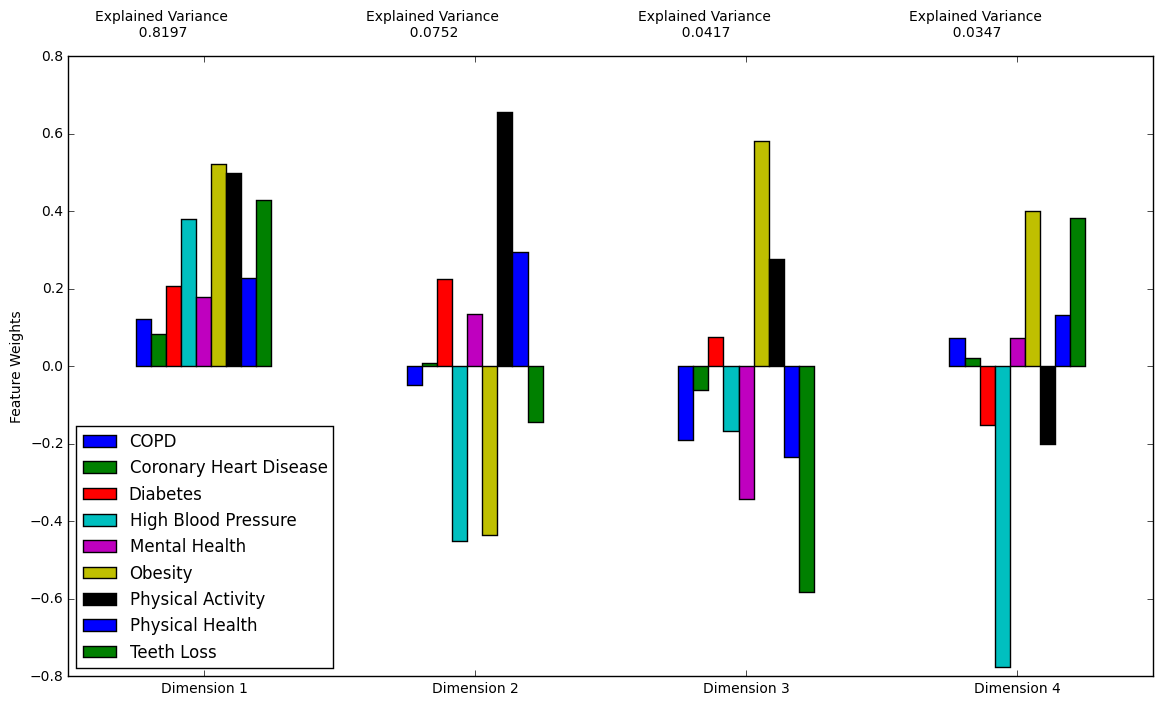

In [269]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA


pca = PCA(n_components = 4).fit(good_data2)
# is this redundant?
pca.fit(good_data2)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(amples)

# Generate PCA results plot
pca_results = vs.pca_results(stroke_df2, pca)

In [272]:
# TODO: Apply PCA by fitting the good data with only two dimensions

pca = PCA(n_components = 2).fit(good_data2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data2)

# Create a DataFrame for the reduced data 
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

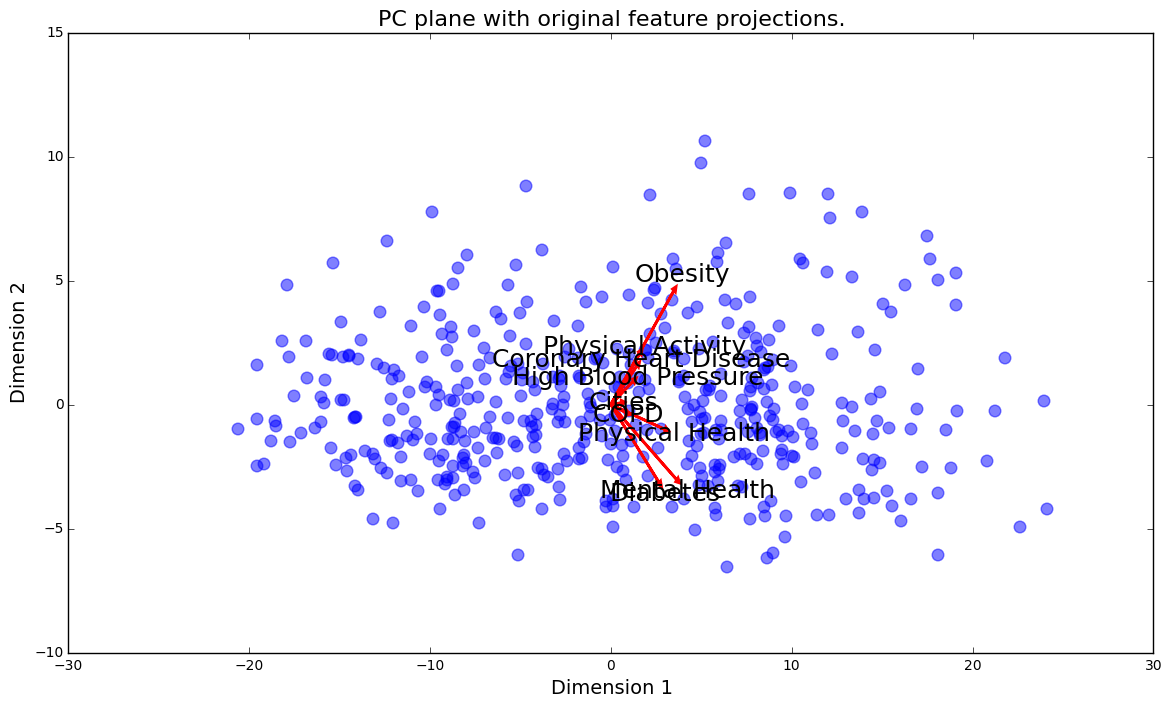

In [273]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

In [280]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
clusterer = KMeans(n_clusters = 2).fit(reduced_data)
#clusterer2 = GaussianMixture(n_components = 2).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
#preds2 = clusterer2.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.cluster_centers_
#centers2 = clusterer2.means_
# TODO: Predict the cluster for each transformed sample data point
#sample_preds = clusterer.predict(pca_samples)
#sample_preds2 = clusterer2.predict(pca_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds, metric = 'euclidean')
print score

0.534649256616


In [282]:
vs.cluster_results(reduced_data, preds, centers, )

TypeError: cluster_results() takes exactly 4 arguments (3 given)

,COPD,Arthritis,Mental Health,Teeth Loss,Diabetes,Physical Health,High Blood Pressure,Coronary Heart Disease,Current Smoking,Physical Activity,Sleep,Obesity
Cities,,,,,,,,,,,,
Abilene,6.7,22.4,11.6,14.3,10.9,12.6,31.6,6.3,19.6,27.7,35.4,33.7
Akron,9.4,29.0,15.3,23.6,13.0,15.5,36.2,7.5,26.8,31.0,44.1,37.3
Alameda,4.3,18.5,9.8,7.5,8.1,9.6,24.3,4.5,11.9,18.7,32.3,18.7
Albany,7.1,25.7,13.2,16.5,10.9,13.1,33.4,6.0,19.0,26.1,39.7,31.1
Albuquerque,5.4,22.4,11.6,14.0,9.3,12.1,25.9,5.3,18.8,20.4,32.8,25.5


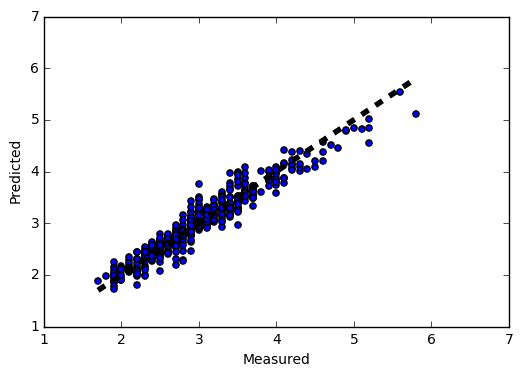

In [37]:

lr = LinearRegression()
X = datacorr_df[stroke_preds]
display(X.head())
y = datacorr_df.Stroke
predicted = cross_val_predict(lr, X, y, cv = 10 )

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

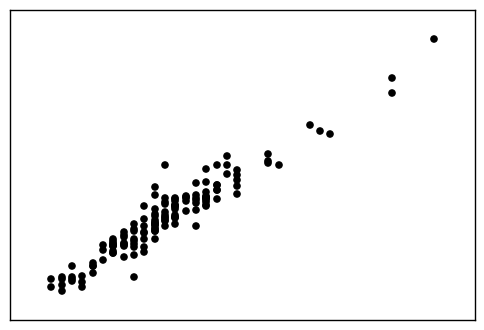

In [38]:
# creating linear regression, training on a subset of the data, 70%
# testing on 30%. plotting the predicted stroke values against the 
# actual test set values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,
                                                   random_state = 42)

lr.fit(X_train, y_train)
lr.score(X_test, y_test)
predicted = lr.predict(X_test)


plt.scatter(y_test, predicted,  color='black')
#plt.scatter(X_test['Current Smoking'], lr.predict(X_test), color='blue',
#         linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

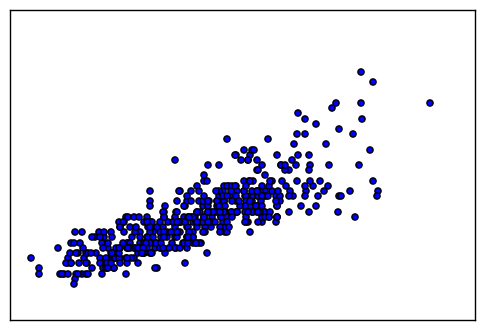

In [39]:
plt.scatter(X['Physical Activity'], y)
plt.xticks(())
plt.yticks(())
plt.show()



0.90986315603394086

mean squared error between predicted and actual = 0.0306448230384


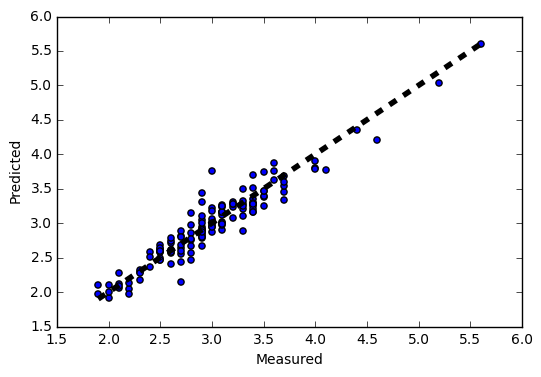

In [86]:
# similar to what was done above where stroke predictors were used as X, stroke prevalence as y
# linear regressor was trained on training data and tested using testing data. 

stroke_y = datacorr_df['Stroke']
#display(stroke_y.head())
stroke_X = datacorr_df[stroke_preds]
#display(stroke_X.head())
X_train, X_test, y_train, y_test = train_test_split(stroke_X, stroke_y, test_size = 0.29,
                                                   random_state = 42)
lr.fit(X_train, y_train)
display(lr.score(X_test, y_test))

predicted = lr.predict(X_test)

print "mean squared error between predicted and actual = {}".format(np.mean((predicted - y_test)**2))

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

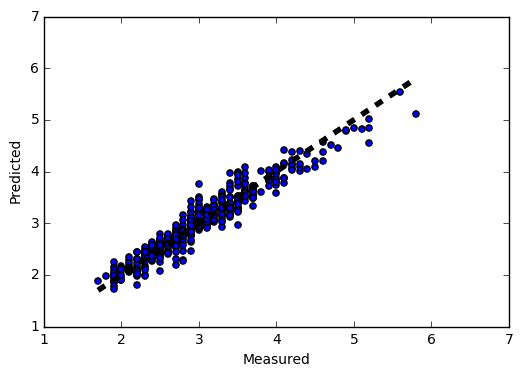

In [50]:
# similar to what was done above where stroke predictors were used as X, 
# stroke prevalence was used as y and a cross_validation prediction was performed
# using the entire dataset. 


predicted = cross_val_predict(lr, stroke_X, stroke_y, cv = 10)
fig, ax = plt.subplots()
ax.scatter(stroke_y, predicted)
ax.plot([stroke_y.min(), stroke_y.max()], [stroke_y.min(), stroke_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [43]:
print np.mean((predicted - stroke_y)**2)

0.0338854724703


In [62]:
from sklearn import svm
print "wonk"

wonk


In [73]:
#using support vector machine classifier to predict

X_train, X_test, y_train, y_test = train_test_split(stroke_X, stroke_y, test_size = 0.35,
                                                   random_state = 42)
clf = svm.SVR(kernel = "linear", C = 1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.92799860254076016

In [78]:
scores = cross_val_score(clf, X_test, y_test, cv =  )

In [79]:
scores.mean()

0.88705867440585384

In [84]:
pow(scores.std(),2)

0.0016044958729494407

In [98]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(stroke_X, stroke_y, test_size = 0.5,
                                                   random_state = 42)
lr.fit(X_train, y_train)
predicted = cross_val_predict(lr, X_test, y_test, cv = 5)
metrics.r2_score(y_test, predicted)

0.92330330904498481

In [26]:
print "wonk"

wonk


In [91]:
clf2 = svm.SVR(kernel = "poly", C = 1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.90879366140310203